In [17]:
import numpy as np
import pandas as pd

import missingno
import matplotlib.pyplot as plt
import plotly.express as plx

import country_converter

## Data Exploration

In [18]:
df = pd.read_csv("GHSH_Pooled_Data1.csv")

df.head()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9


In [19]:
print("Shape of the dataframe", df.shape)

Shape of the dataframe (106, 17)


In [20]:
df.describe()

,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,104.000000,106.000000,102.000000,106.000000,106.000000,106.000000
mean,2014.698113,31.815094,22.496226,23.694340,7.642453,33.190566,29.996226,26.679245,15.546154,32.448113,31.109804,43.723679,7.744340,14.452830
std,2.089292,53.454089,16.553129,15.764075,8.713536,11.559408,10.786728,17.401318,10.748501,15.297701,14.185479,14.808421,4.365254,9.273621
min,2010.000000,1.400000,0.800000,3.300000,0.000000,5.600000,6.500000,2.500000,1.200000,3.500000,9.900000,15.200000,1.500000,2.700000
25%,2013.000000,11.550000,9.000000,11.400000,2.025000,25.825000,22.450000,12.600000,7.050000,20.750000,21.775000,34.800000,4.500000,9.400000
50%,2015.000000,26.000000,19.650000,21.800000,4.350000,33.400000,28.950000,22.350000,12.600000,29.650000,27.550000,41.400000,6.950000,11.850000
75%,2016.000000,42.350000,30.475000,31.850000,9.575000,40.850000,36.825000,37.100000,22.000000,42.700000,41.150000,53.150000,9.700000,18.425000
max,2018.000000,548.000000,80.200000,70.600000,43.200000,63.900000,62.200000,73.900000,43.800000,76.500000,78.600000,87.700000,24.800000,67.200000


## Show Unique Values for Specific Columns

In [21]:
def unique_values(columns):
    for col in columns:
        print("\n Unique Values for {} column".format(col))
        val = df[col].unique()
        print(sorted(val))
        print("Total values:", str(len(val)))
        print("="*100)

In [22]:
unique_values(["Country", "Year", "Age Group", "Sex"])


 Unique Values for Country column
['Argentina', 'Barabados', 'Benin', 'Bhutan', 'Brunei Darussalam ', 'Dominican Republic ', 'Fiji Islands', 'Indonesia', 'Jamaica', 'Kiribati', 'Laos', 'Malaysia', 'Mauritus', 'Mongolia', 'Namibia', 'Nepal', 'Peru', 'Samoa', 'Seychelles', 'Suriname', 'Thailand', 'Timor-Leste ', 'Trinidad and Tobago ', 'Tuvalu ', 'Uruguay ', 'Vanuatu ', 'Wallis and Futuna ']
Total values: 27

 Unique Values for Year column
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Total values: 9

 Unique Values for Age Group column
['13-15', '16-17']
Total values: 2

 Unique Values for Sex column
['Female', 'Male']
Total values: 2


From this, we have:
- 26 COUNTRIES
- 8 Years from 2010-2017
- Age group: 13-15 | 16-17

### Check missing data

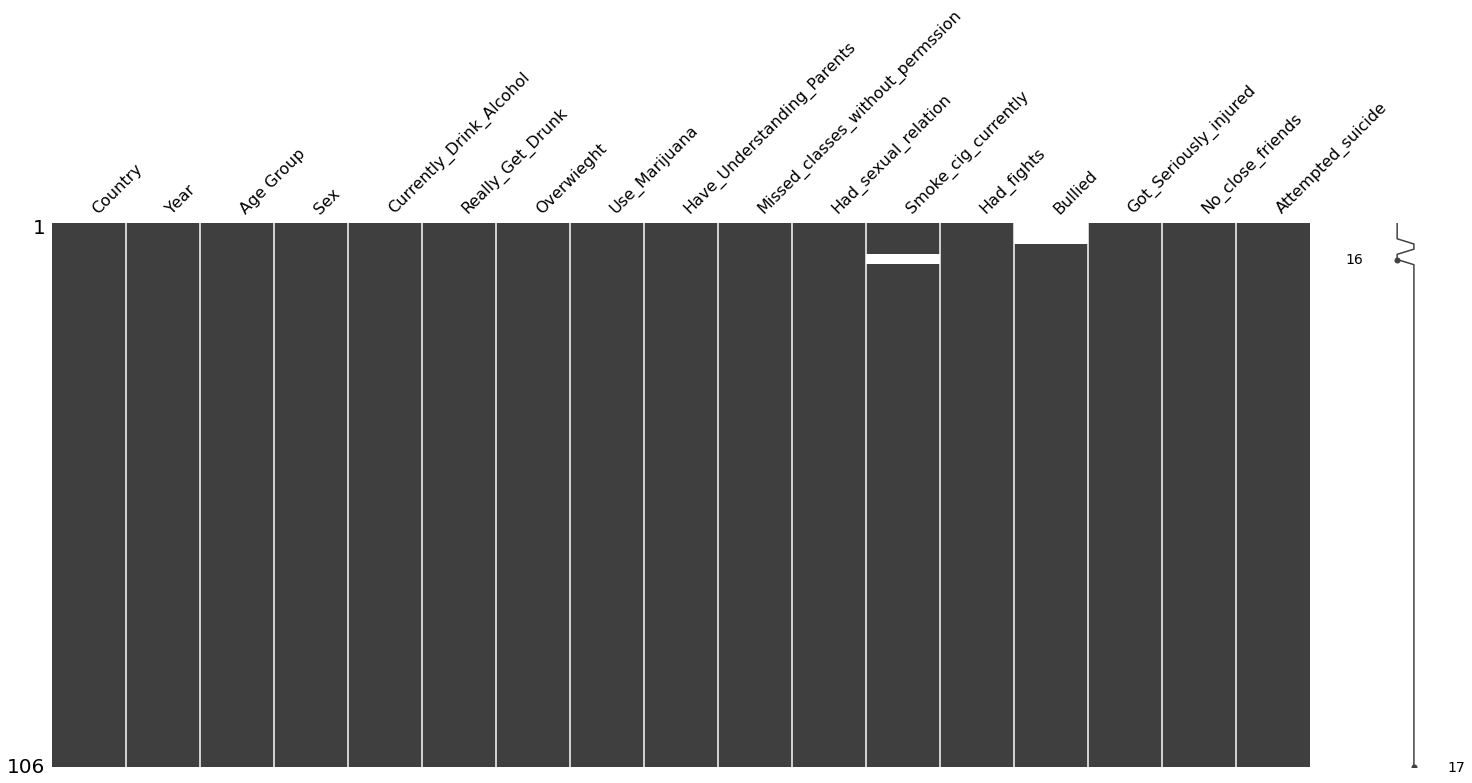

In [23]:
missingno.matrix(df)
plt.show()

In [24]:
print("Total missing data:",df.isnull().sum().sum())

Total missing data: 6


Since there are few counts of missing data, it is okay to drop them

In [25]:
df.isnull().sum()

Country                             0
Year                                0
Age Group                           0
Sex                                 0
Currently_Drink_Alcohol             0
Really_Get_Drunk                    0
Overwieght                          0
Use_Marijuana                       0
Have_Understanding_Parents          0
Missed_classes_without_permssion    0
Had_sexual_relation                 0
Smoke_cig_currently                 2
Had_fights                          0
Bullied                             4
Got_Seriously_injured               0
No_close_friends                    0
Attempted_suicide                   0
dtype: int64

In [26]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True)

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9
1,Argentina,2012,13-15,Female,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,18.9
2,Benin,2016,13-15,Male,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,14.4
3,Benin,2016,13-15,Female,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,9.6
4,Benin,2016,16-17,Male,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vanuatu,2011,13-15,Female,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5
96,Wallis and Futuna,2015,13-15,Male,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7
97,Wallis and Futuna,2015,13-15,Female,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9
98,Wallis and Futuna,2015,16-17,Male,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0


In [27]:
df.shape

(100, 17)

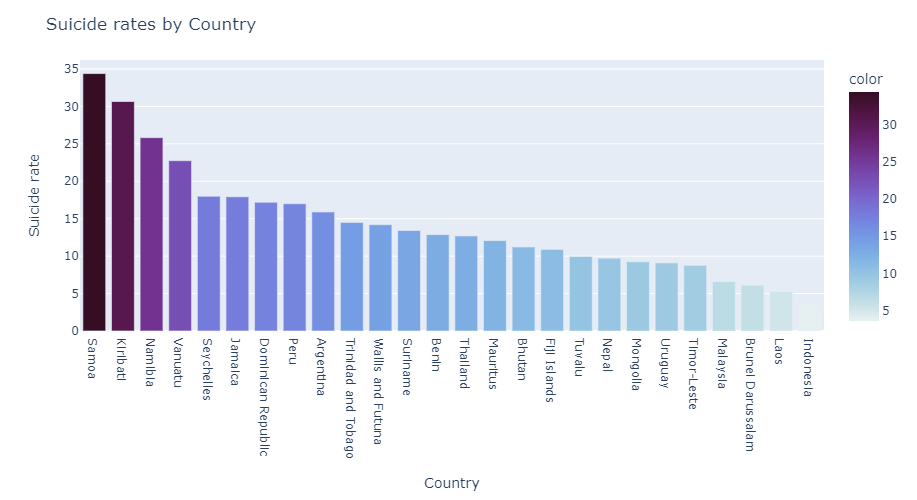

In [28]:
df_mean = df.groupby('Country')[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending=False)
fig_bar = plx.bar(x=df_mean.index, y=df_mean["Attempted_suicide"], color = df_mean.Attempted_suicide, color_continuous_scale='dense')
fig_bar.update_layout(width = 850, height = 500, title_text="Suicide rates by Country")
fig_bar.update_xaxes(title = 'Country')
fig_bar.update_yaxes(title = 'Suicide rate')
fig_bar.show()

In [29]:
df.groupby('Sex')[['Attempted_suicide']].mean()

,Attempted_suicide
Sex,
Female,14.976
Male,13.970


In [30]:
# Change Mauritus to Mauritius
df.replace({"Mauritus":"Mauritius"}, inplace=True)
df.head()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9
5,Argentina,2012,13-15,Female,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,18.9
8,Benin,2016,13-15,Male,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,14.4
9,Benin,2016,13-15,Female,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,9.6
10,Benin,2016,16-17,Male,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,13.4


In [31]:
df['Country_ISO3'] = country_converter.convert(names=df["Country"], to="ISO3")

In [32]:
df

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide,Country_ISO3
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9,ARG
5,Argentina,2012,13-15,Female,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,18.9,ARG
8,Benin,2016,13-15,Male,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,14.4,BEN
9,Benin,2016,13-15,Female,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,9.6,BEN
10,Benin,2016,16-17,Male,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,13.4,BEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Vanuatu,2011,13-15,Female,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5,VUT
102,Wallis and Futuna,2015,13-15,Male,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7,WLF
103,Wallis and Futuna,2015,13-15,Female,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9,WLF
104,Wallis and Futuna,2015,16-17,Male,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0,WLF


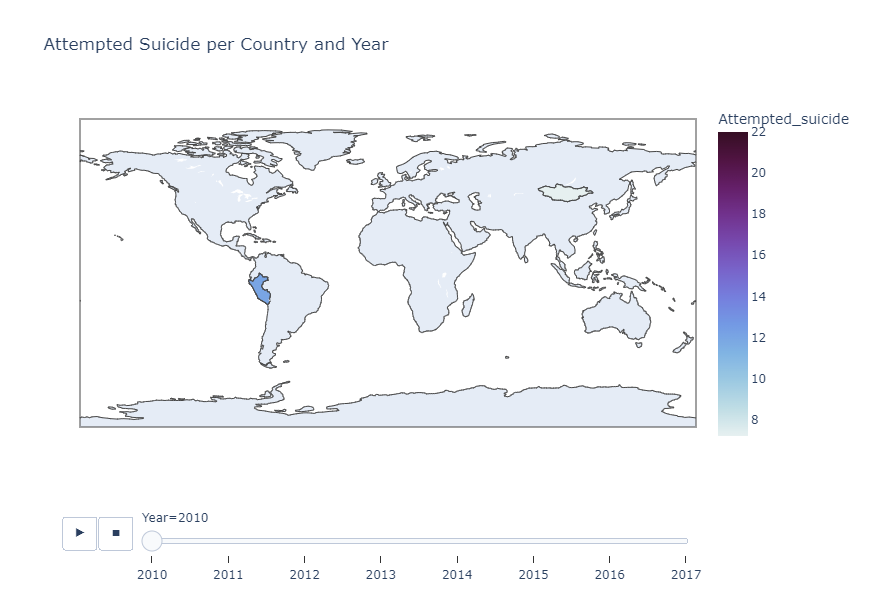

In [39]:
fig = plx.choropleth(df.sort_values('Year'), locations='Country_ISO3',
                    color='Attempted_suicide',
                    color_continuous_scale='dense',
                    title = 'Attempted Suicide per Country and Year', 
                    animation_frame='Year')
fig.update_layout(width = 850, height = 600, title_text="Attempted Suicide per Country and Year")
fig.show()

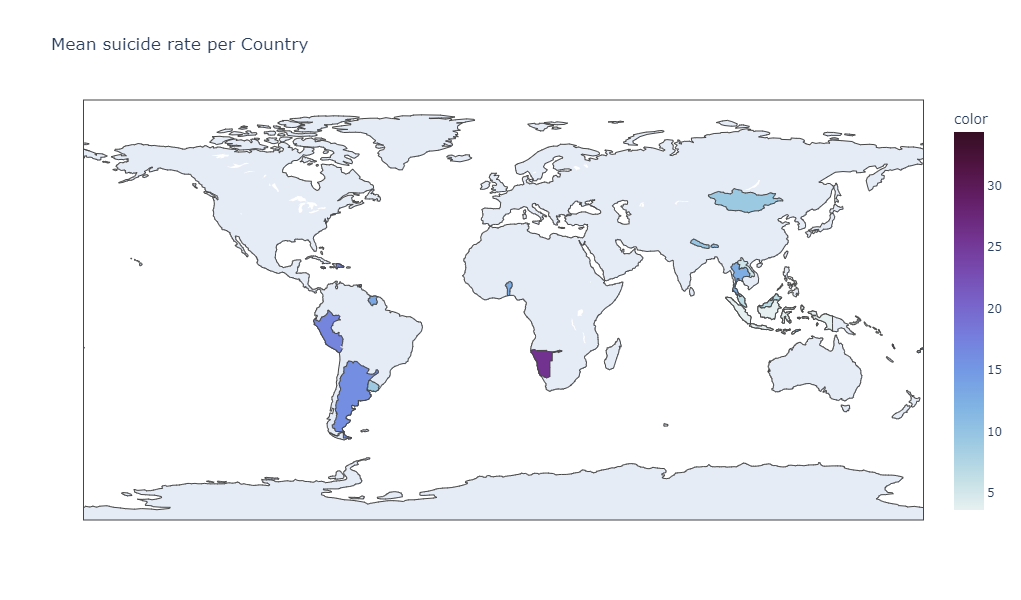

In [42]:
df_mean = df.groupby('Country_ISO3')[['Attempted_suicide']].mean().sort_values('Attempted_suicide',ascending = False)
fig = plx.choropleth(locations=df_mean.index,
                    color=df_mean['Attempted_suicide'],
                    color_continuous_scale='dense',
                    title = 'Mean suicide rate per Country')


fig.update_layout(width = 850, height = 600, title_text="Mean suicide rate per Country")
fig.show()

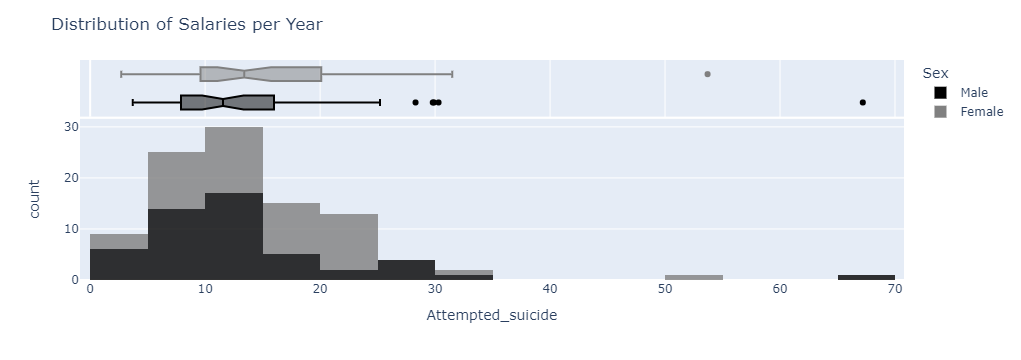

In [46]:
fig = plx.histogram(df, x = 'Attempted_suicide', color = 'Sex', marginal="box", opacity = 0.8,
                   color_discrete_sequence = ['black', 'gray', 'blue'])

fig.update_layout(width = 850, title_text="Distribution of Salaries per Year")
fig.show()

In [47]:
df.loc[32,'Currently_Drink_Alcohol'] = 54.8
## we ha an oultlier here with Currently_Drink_Alcohol set as 548% , will assume it was 54.8

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 4 to 105
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           100 non-null    object 
 1   Year                              100 non-null    int64  
 2   Age Group                         100 non-null    object 
 3   Sex                               100 non-null    object 
 4   Currently_Drink_Alcohol           100 non-null    float64
 5   Really_Get_Drunk                  100 non-null    float64
 6   Overwieght                        100 non-null    float64
 7   Use_Marijuana                     100 non-null    float64
 8   Have_Understanding_Parents        100 non-null    float64
 9   Missed_classes_without_permssion  100 non-null    float64
 10  Had_sexual_relation               100 non-null    float64
 11  Smoke_cig_currently               100 non-null    float64
 12  Had_figh

# Guide Questions

## Q1: Are those who are overweight gets bullied more often ?

In [55]:
overweight_bullied_df = df.groupby(['Overwieght', 'Bullied'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending=False)

In [56]:
overweight_bullied_df.head()

,,Attempted_suicide
Overwieght,Bullied,
43.4,78.6,67.2
59.1,69.4,53.7
46.4,32.2,31.5
12.8,60.0,30.3
6.3,47.9,29.9


In [58]:
overweight_bullied_df.tail()

,,Attempted_suicide
Overwieght,Bullied,
10.3,9.9,3.8
12.6,24.0,3.7
52.2,15.0,3.6
14.9,19.0,3.6
13.1,13.0,2.7


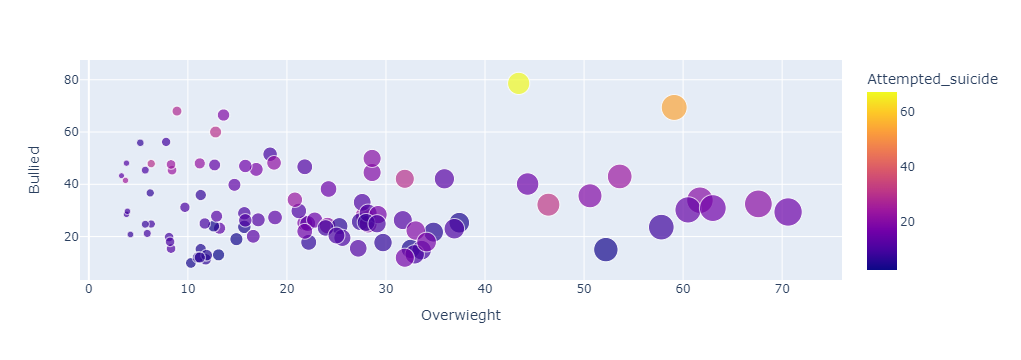

In [70]:
fig = plx.scatter(df, x='Overwieght', y='Bullied', color='Attempted_suicide', size='Overwieght')
fig.show()

## Q2: do those who Use Marijuana have understanding parents ?¶

## Q3: is having No close friends while getting Bullied a reason?